In [9]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

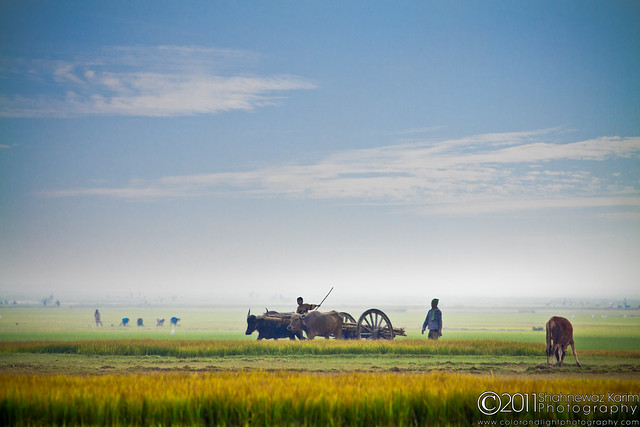

In [10]:
image = Image.open('village.jpg')
image

In [11]:
image.size

(640, 427)

In [12]:
max_dim = 512
long = max(image.size)
long

640

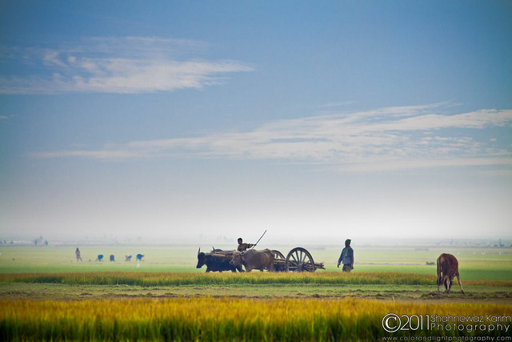

In [13]:
scale = max_dim/long
img = image.resize((round(image.size[0]*scale), round(image.size[1]*scale)))
img

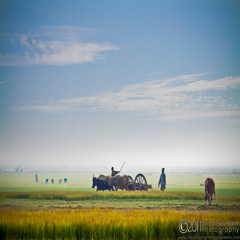

In [14]:
img_240 = image.resize((240,240))
img_240

In [15]:
img_data = img_240.getdata()
type(img_data)

ImagingCore

In [16]:
img_arr = np.array(img_data)
img_arr

array([[ 55,  91, 117],
       [ 55,  91, 119],
       [ 54,  91, 122],
       ...,
       [ 17,  22,   0],
       [ 10,  19,   0],
       [  3,   9,   0]])

In [17]:
img_arr_norm = img_arr / 255.0
img_arr_norm

array([[0.21568627, 0.35686275, 0.45882353],
       [0.21568627, 0.35686275, 0.46666667],
       [0.21176471, 0.35686275, 0.47843137],
       ...,
       [0.06666667, 0.08627451, 0.        ],
       [0.03921569, 0.0745098 , 0.        ],
       [0.01176471, 0.03529412, 0.        ]])

In [18]:
img_arr_norm.shape

(57600, 3)

In [18]:
import argparse

In [22]:
"""ap = argparse.ArgumentParser()
ap.add_argument("-m","--model",required = True, help = "neural style transfer model")
ap.add_argument("-i", "--image", required = True, help = "input image to apply NST to")
args = vars(ap.parse_args())"""

'ap = argparse.ArgumentParser()\nap.add_argument("-m","--model",required = True, help = "neural style transfer model")\nap.add_argument("-i", "--image", required = True, help = "input image to apply NST to")\nargs = vars(ap.parse_args())'

In [36]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [20]:
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
image = load_img('village.jpg', target_size = (224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' %(label[1],label[2]*100) )

lakeside (19.79%)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


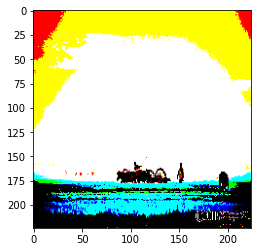

In [23]:
plt.imshow(np.squeeze(image, axis = 0))

In [24]:
yhat = model.predict(image)
label = decode_predictions(yhat)

In [26]:
label

[[('n09332890', 'lakeside', 0.19790043),
  ('n11879895', 'rapeseed', 0.12232915),
  ('n07802026', 'hay', 0.087989554),
  ('n02782093', 'balloon', 0.069139116),
  ('n02410509', 'bison', 0.06588247)]]

In [37]:
intermediate_layer_model = VGG16()
model_2 = Model(inputs = intermediate_layer_model.inputs,outputs = intermediate_layer_model.layers[-2].output)
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [29]:
im_layers = [layers for layers in model.layers]
im_layers

In [34]:
intermediate_layer_model.inputs

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_8')>]

In [30]:
im_layers[-2].output

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'fc2')>

In [38]:
features = model_2.predict(image)
features

array([[0.       , 0.       , 1.6884863, ..., 1.3242531, 2.8262584,
        0.       ]], dtype=float32)

In [39]:
features.shape

(1, 4096)

In [52]:
import pickle
pickle.dump(features, open('village.pkl', 'wb'))

In [54]:
village_pkl = pickle.load(open('village.pkl','rb'))
village_pkl

array([[0.       , 0.       , 1.6884863, ..., 1.3242531, 2.8262584,
        0.       ]], dtype=float32)

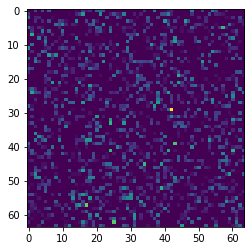

In [55]:
plt.imshow(village_pkl.reshape((64,64)))

In [56]:
model_3 = Model(inputs = intermediate_layer_model.inputs,outputs = intermediate_layer_model.layers[-6].output)
features_3 = model_3.predict(image)
features_3.shape

(1, 14, 14, 512)

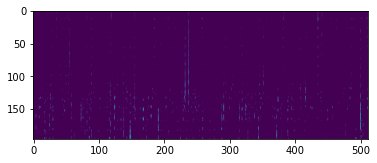

In [58]:
plt.imshow(np.squeeze(features_3, axis =0).reshape(196,512))

In [59]:
model_4 = Model(inputs = intermediate_layer_model.inputs,outputs = intermediate_layer_model.layers[-18].output)
features_4 = model_4.predict(image)
features_4.shape

(1, 112, 112, 128)

In [ ]:
#plt.imshow(np.squeeze(features_3, axis =0).reshape(196,512))

In [60]:
model = VGG16(include_top = False, input_shape = (224, 224, 3))

58900480/58889256 [==============================] - 10s 0us/step


In [61]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [62]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

flatten1 = Flatten()(model.layers[-1].output)
dense1 = Dense(1024, activation = 'relu')(flatten1)
output = Dense(10, activation = 'softmax')(dense1)
model = Model(inputs= model.inputs, outputs=output)

In [63]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [65]:
yhat = model.predict(image)
yhat.shape

(1, 10)

In [66]:
yhat

array([[3.8605639e-01, 1.3019460e-05, 7.9541442e-06, 2.1866547e-02,
        4.0076058e-02, 1.5988134e-10, 2.3621155e-12, 5.5192703e-01,
        5.3058811e-05, 3.5084615e-09]], dtype=float32)